In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [4]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [5]:
df_sol = pd.read_excel("US12I1O_gradientboostingregressor_Solution.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.452396,0.001918,0.000000e+00,0.001054,0.000000e+00,0.000000,0.000000,0.000000e+00,0.001918,0.001054,0.000000,0.000000e+00,0.000000e+00,0.001804
DMU 0002,0.614890,0.000893,2.083228e-04,0.000893,2.083228e-04,0.000083,0.000208,2.083228e-04,0.000893,0.000208,0.000000,2.083228e-04,2.083228e-04,0.001650
DMU 0003,0.531879,0.001424,0.000000e+00,0.000860,0.000000e+00,0.000000,0.000584,0.000000e+00,0.001029,0.000584,0.000000,0.000000e+00,0.000000e+00,0.001813
DMU 0004,0.736800,0.001250,0.000000e+00,0.000714,0.000000e+00,0.000000,0.000559,0.000000e+00,0.000714,0.000714,0.000000,0.000000e+00,0.000000e+00,0.001592
DMU 0005,0.655633,0.001225,0.000000e+00,0.000757,0.000000e+00,0.000000,0.000570,5.701252e-04,0.000757,0.000614,0.000000,0.000000e+00,0.000000e+00,0.001752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.602185,0.002022,1.210457e-04,0.000598,1.210457e-04,0.000121,0.000121,1.210457e-04,0.002022,0.000598,0.000000,1.210457e-04,1.210457e-04,0.002157
DMU 0997,0.625057,0.000963,4.821360e-05,0.000963,3.277403e-04,0.000048,0.000328,3.277403e-04,0.000963,0.000963,0.000000,3.277403e-04,4.821360e-05,0.001815
DMU 0998,0.561999,0.001223,0.000000e+00,0.000760,0.000000e+00,0.000000,0.000576,5.757285e-04,0.000760,0.000576,0.000000,0.000000e+00,0.000000e+00,0.001753
DMU 0999,0.678913,0.000970,7.311812e-07,0.000970,7.311812e-07,0.000000,0.000970,7.311812e-07,0.000970,0.000970,0.000000,7.311812e-07,7.311812e-07,0.001785


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-2e21bf80-94e5-41fe-a190-0482a01060ac", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      532
Weight_Input 03        1
Weight_Input 04      319
Weight_Input 05      757
Weight_Input 06       42
Weight_Input 07      200
Weight_Input 08        1
Weight_Input 09       12
Weight_Input 10      865
Weight_Input 11      401
Weight_Input 12      635
Weight_Output 01       0
dtype: int64
Total :  3765


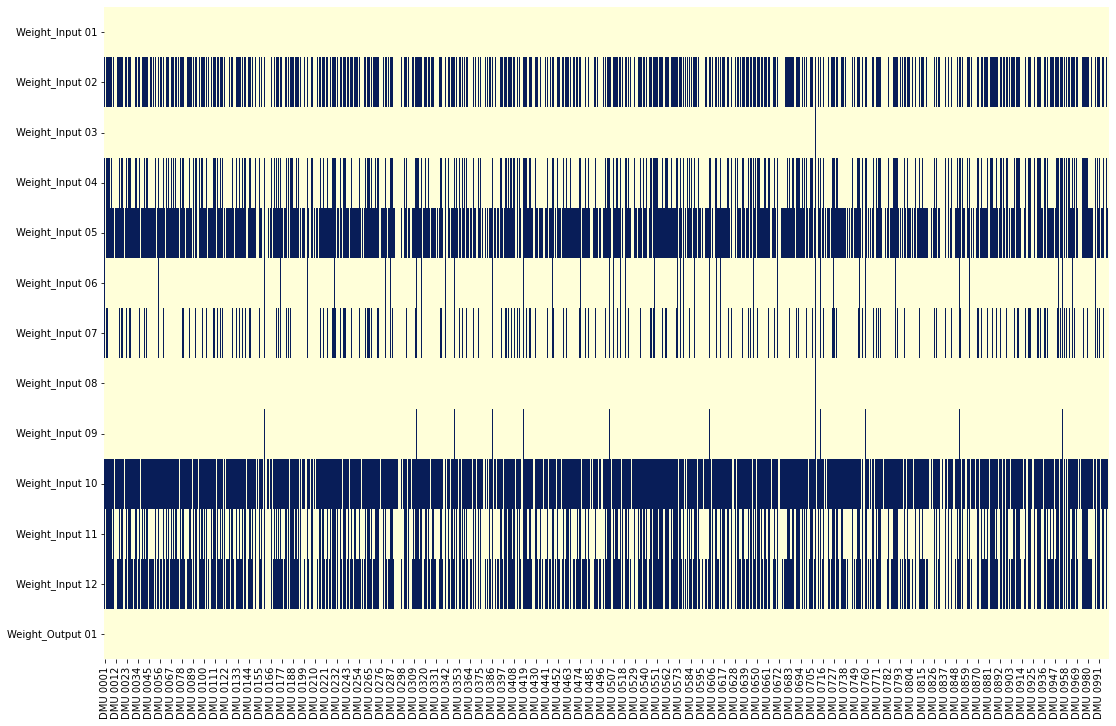

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

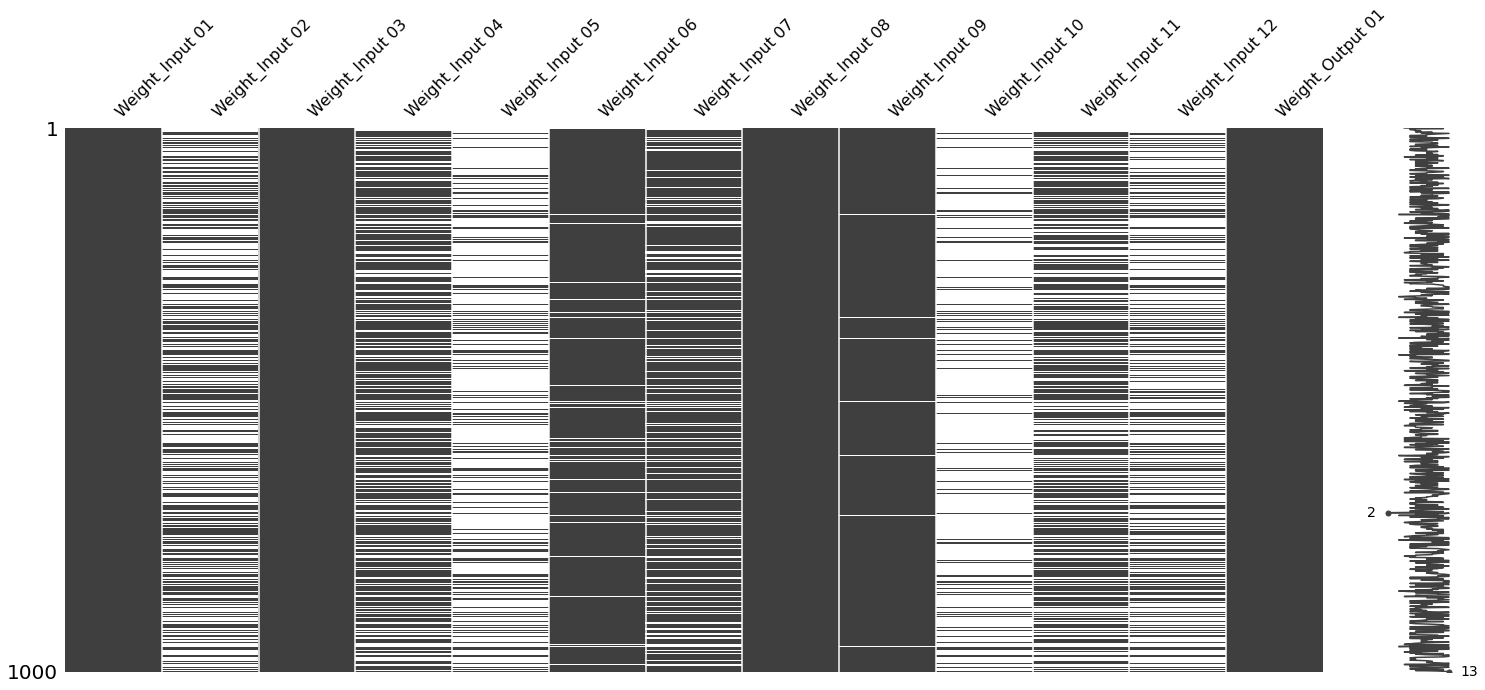

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [12]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        3.765000
std         2.541305
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
dtype: float64

### DecisionTreeRegressor

In [13]:
df_dt = pd.read_excel("US12I1O_decisiontreeregressor_Solution_2.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.425972,0.001425,0.0,0.000296,0.000296,0.000296,0.000296,0.0,0.000296,0.000296,0.000000,0.000000,0.000296,0.001699
DMU 0002,0.599850,0.001156,0.0,0.000446,0.000446,0.000000,0.000446,0.0,0.000446,0.000000,0.000000,0.000000,0.000446,0.001609
DMU 0003,0.530012,0.001651,0.0,0.000290,0.000290,0.000000,0.000587,0.0,0.000325,0.000000,0.000000,0.000000,0.000325,0.001806
DMU 0004,0.734761,0.001506,0.0,0.000000,0.000000,0.000000,0.001225,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.631340,0.001385,0.0,0.000165,0.000165,0.000165,0.000563,0.0,0.000165,0.000165,0.000165,0.000165,0.000165,0.001687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.555497,0.001904,0.0,0.000067,0.000067,0.000067,0.000692,0.0,0.000692,0.000067,0.000000,0.000000,0.000446,0.001989
DMU 0997,0.592319,0.001487,0.0,0.000340,0.000340,0.000000,0.000529,0.0,0.000340,0.000000,0.000000,0.000000,0.000340,0.001720
DMU 0998,0.559025,0.001569,0.0,0.000262,0.000262,0.000086,0.000535,0.0,0.000262,0.000086,0.000000,0.000000,0.000262,0.001744
DMU 0999,0.684471,0.001388,0.0,0.000000,0.000000,0.000000,0.001388,0.0,0.000932,0.000000,0.000000,0.000000,0.000000,0.001800


In [14]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      896
Weight_Input 03      173
Weight_Input 04      138
Weight_Input 05      406
Weight_Input 06        1
Weight_Input 07      926
Weight_Input 08       33
Weight_Input 09      303
Weight_Input 10      538
Weight_Input 11      689
Weight_Input 12       97
Weight_Output 01       0
dtype: int64
Total :  4200


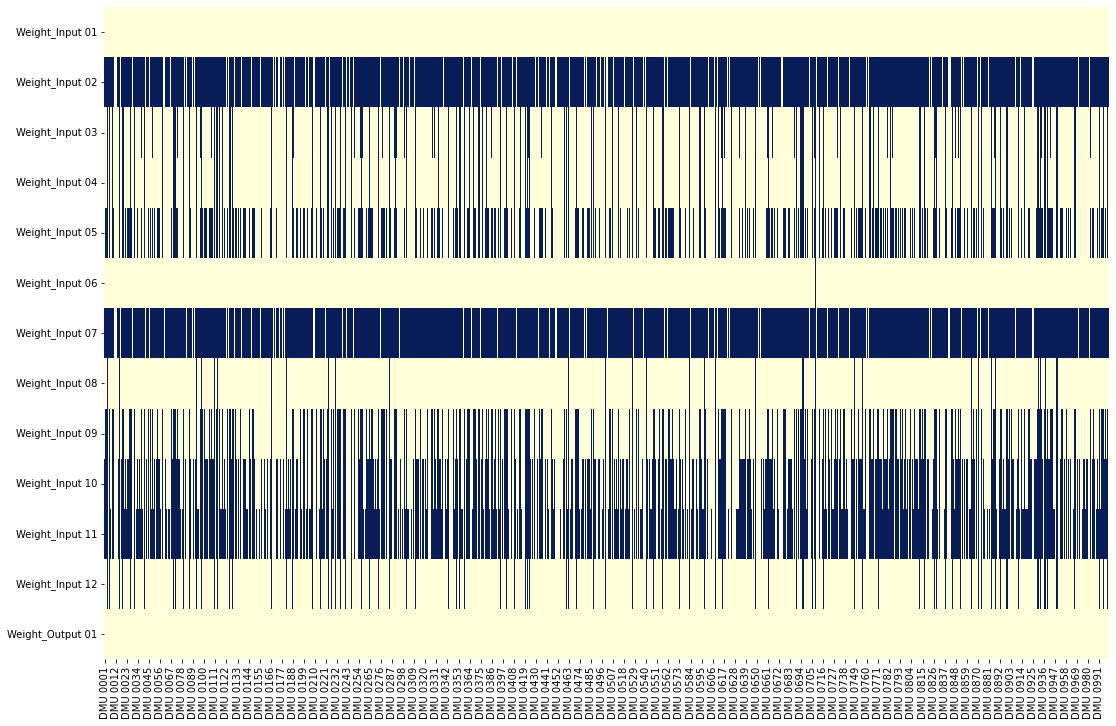

In [15]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [16]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4524,0.4260,0.0264,5.8409,True
DMU 0002,0.6149,0.5999,0.0150,2.4459,True
DMU 0003,0.5319,0.5300,0.0019,0.3509,True
DMU 0004,0.7368,0.7348,0.0020,0.2767,True
DMU 0005,0.6556,0.6313,0.0243,3.7052,True
...,...,...,...,...,...
DMU 0996,0.6022,0.5555,0.0467,7.7531,True
DMU 0997,0.6251,0.5923,0.0327,5.2376,True
DMU 0998,0.5620,0.5590,0.0030,0.5292,True
DMU 0999,0.6789,0.6845,-0.0056,-0.8186,True


In [17]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-c4cd46f0-87bc-4e1c-902b-a1044e0dc24f", "code": {"imports…

In [18]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  954
red :  46


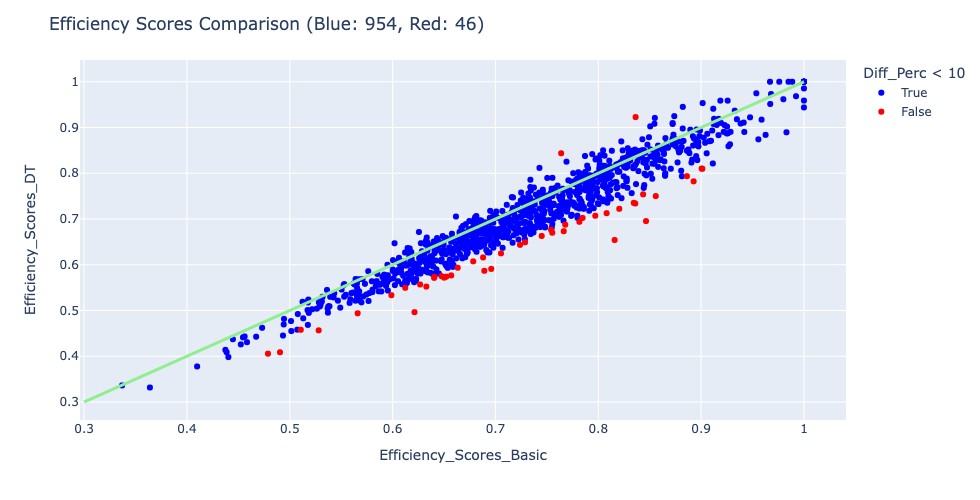

In [19]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [20]:
df_rf = pd.read_excel("US12I1O_randomforestregressor_Solution_2.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.428969,0.001307,0.0,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.0,0.000282,0.000282,0.001711
DMU 0002,0.606434,0.001010,0.0,0.000330,0.000198,0.000330,0.000330,0.000198,0.000330,0.000198,0.0,0.000330,0.000330,0.001627
DMU 0003,0.521019,0.001406,0.0,0.000272,0.000244,0.000272,0.000442,0.000000,0.000272,0.000000,0.0,0.000272,0.000272,0.001776
DMU 0004,0.784307,0.000774,0.0,0.000000,0.000000,0.000774,0.000774,0.000000,0.000774,0.000000,0.0,0.000000,0.000000,0.001695
DMU 0005,0.643517,0.001296,0.0,0.000395,0.000000,0.000395,0.000633,0.000000,0.000395,0.000000,0.0,0.000000,0.000000,0.001720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.551087,0.001645,0.0,0.000309,0.000000,0.000309,0.000590,0.000000,0.000590,0.000000,0.0,0.000000,0.000309,0.001974
DMU 0997,0.599881,0.001179,0.0,0.000355,0.000302,0.000355,0.000355,0.000000,0.000355,0.000000,0.0,0.000302,0.000302,0.001742
DMU 0998,0.573496,0.001348,0.0,0.000410,0.000000,0.000410,0.000658,0.000000,0.000410,0.000000,0.0,0.000000,0.000000,0.001789
DMU 0999,0.684471,0.001388,0.0,0.000000,0.000000,0.000000,0.001388,0.000000,0.000932,0.000000,0.0,0.000000,0.000000,0.001800


In [21]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      873
Weight_Input 03      188
Weight_Input 04      482
Weight_Input 05      103
Weight_Input 06        1
Weight_Input 07      582
Weight_Input 08       26
Weight_Input 09      548
Weight_Input 10      711
Weight_Input 11      458
Weight_Input 12      432
Weight_Output 01       0
dtype: int64
Total :  4404


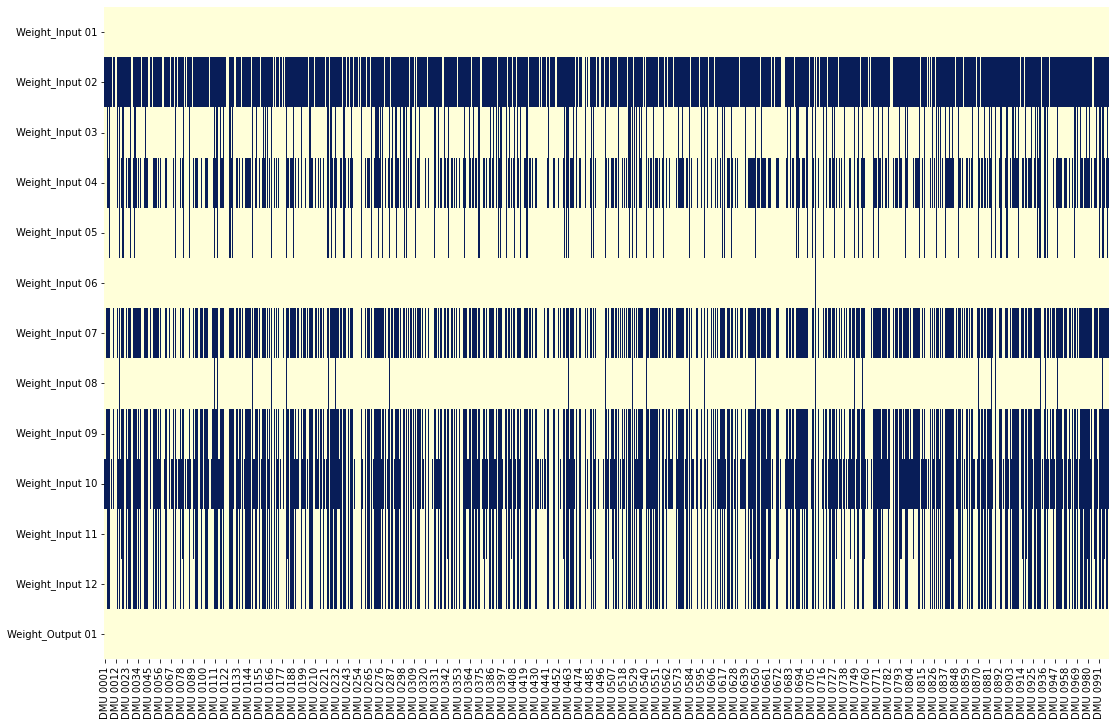

In [22]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [23]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4524,0.4290,0.0234,5.1785,True
DMU 0002,0.6149,0.6064,0.0085,1.3752,True
DMU 0003,0.5319,0.5210,0.0109,2.0418,True
DMU 0004,0.7368,0.7843,-0.0475,-6.4477,True
DMU 0005,0.6556,0.6435,0.0121,1.8479,True
...,...,...,...,...,...
DMU 0996,0.6022,0.5511,0.0511,8.4854,True
DMU 0997,0.6251,0.5999,0.0252,4.0277,True
DMU 0998,0.5620,0.5735,-0.0115,-2.0458,True
DMU 0999,0.6789,0.6845,-0.0056,-0.8186,True


In [24]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-23096909-fdc2-4f37-9ec9-34b409ba0028", "code": {"imports…

In [25]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  962
red :  38


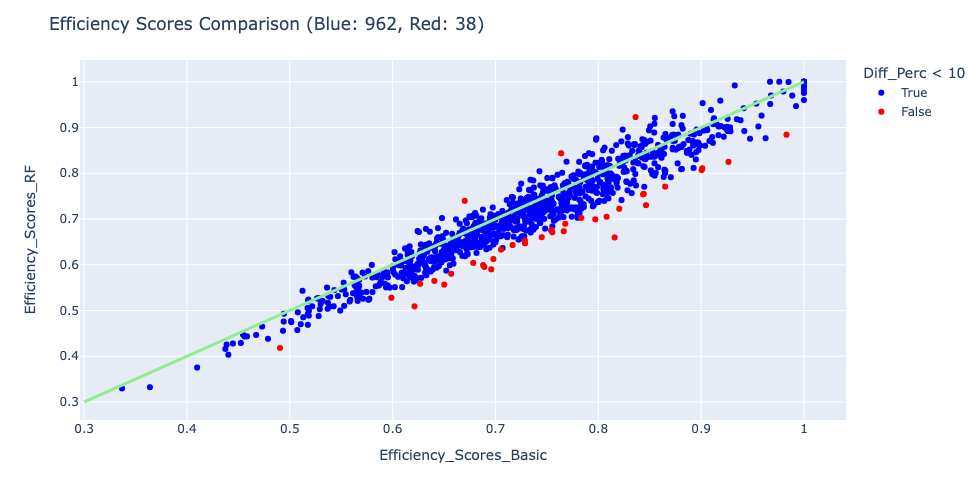

In [26]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [27]:
df_gb = pd.read_excel("US12I1O_gradientboostingregressor_Solution_2.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.427745,0.001306,0.000000,0.000287,0.000287,0.000287,0.000287,0.000287,0.000287,0.000000,0.000000,0.000287,0.000287,0.001706
DMU 0002,0.615526,0.001221,0.000000,0.000419,0.000320,0.000000,0.000419,0.000320,0.000419,0.000000,0.000000,0.000320,0.000320,0.001651
DMU 0003,0.543690,0.001579,0.000000,0.000583,0.000000,0.000000,0.000583,0.000000,0.000583,0.000000,0.000000,0.000000,0.000460,0.001853
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.648628,0.001360,0.000000,0.000774,0.000000,0.000000,0.000774,0.000000,0.000774,0.000000,0.000000,0.000000,0.000000,0.001733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.557580,0.001970,0.000005,0.000482,0.000005,0.000005,0.000556,0.000005,0.000556,0.000005,0.000005,0.000005,0.000482,0.001997
DMU 0997,0.605462,0.001297,0.000000,0.000398,0.000258,0.000188,0.000398,0.000258,0.000398,0.000000,0.000000,0.000258,0.000258,0.001758
DMU 0998,0.568780,0.001396,0.000000,0.000628,0.000085,0.000085,0.000628,0.000085,0.000628,0.000000,0.000000,0.000085,0.000085,0.001774
DMU 0999,0.688266,0.001180,0.000000,0.000545,0.000000,0.000000,0.001180,0.000000,0.001142,0.000000,0.000000,0.000000,0.000000,0.001810


In [28]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      879
Weight_Input 03       57
Weight_Input 04      286
Weight_Input 05      455
Weight_Input 06        1
Weight_Input 07      343
Weight_Input 08       18
Weight_Input 09      909
Weight_Input 10      620
Weight_Input 11      357
Weight_Input 12      229
Weight_Output 01       0
dtype: int64
Total :  4154


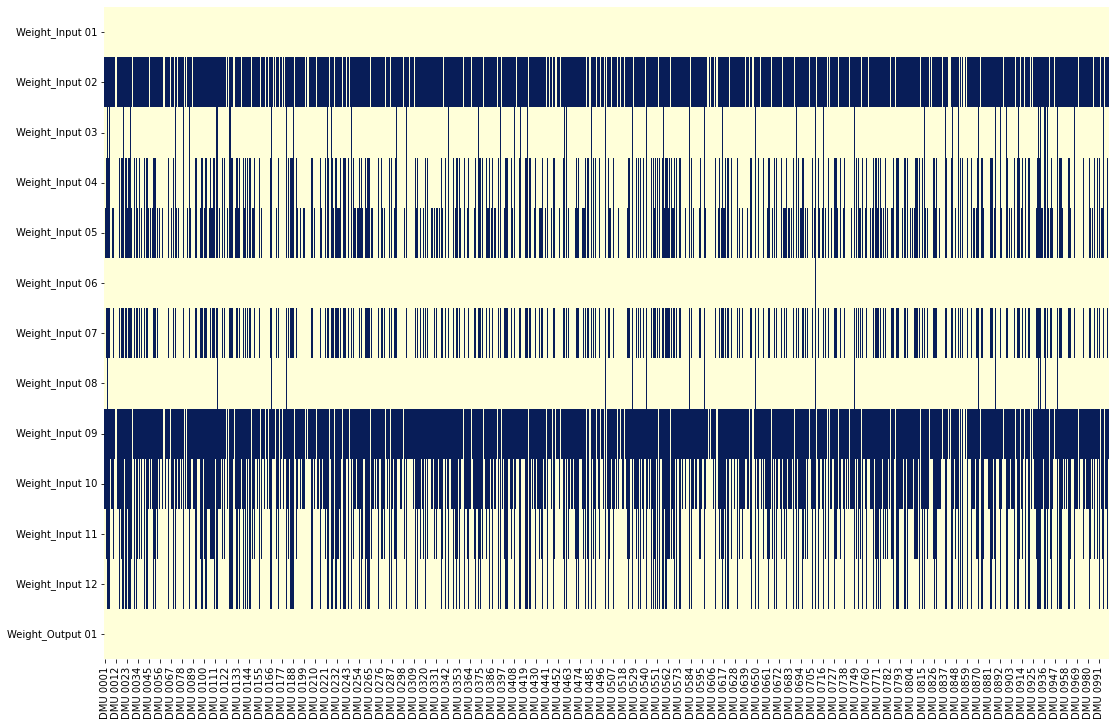

In [29]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [30]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4524,0.4277,0.0247,5.4489,True
DMU 0002,0.6149,0.6155,-0.0006,-0.1035,True
DMU 0003,0.5319,0.5437,-0.0118,-2.2206,True
DMU 0004,0.7368,0.7348,0.0020,0.2767,True
DMU 0005,0.6556,0.6486,0.0070,1.0684,True
...,...,...,...,...,...
DMU 0996,0.6022,0.5576,0.0446,7.4071,True
DMU 0997,0.6251,0.6055,0.0196,3.1349,True
DMU 0998,0.5620,0.5688,-0.0068,-1.2066,True
DMU 0999,0.6789,0.6883,-0.0094,-1.3776,True


In [31]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-72fd82c8-653e-424e-95d2-a52684acd7de", "code": {"imports…

In [32]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  983
red :  17


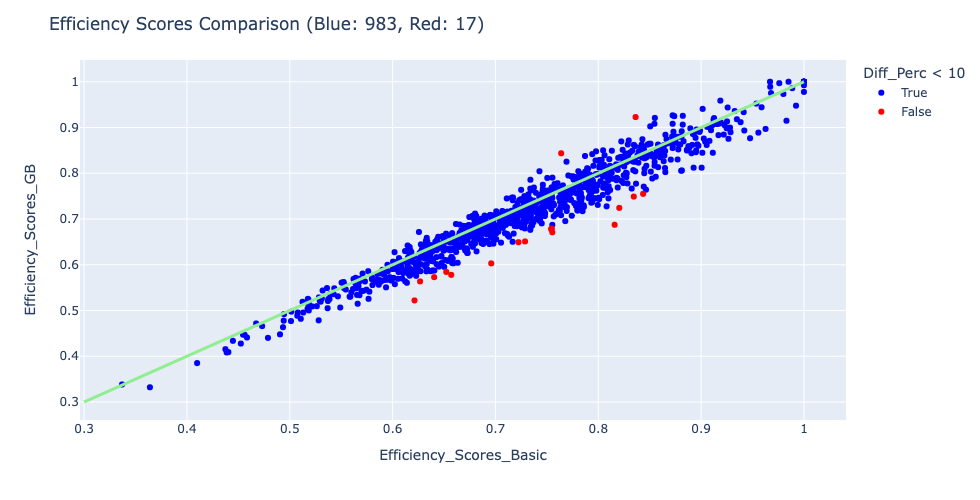

In [33]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [34]:
df_xgb = pd.read_excel("US12I1O_xgbregressor_Solution_2.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.410165,0.001285,0.000219,0.000219,0.000132,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.001636
DMU 0002,0.585085,0.001176,0.000171,0.000171,0.000107,0.000171,0.000388,0.000171,0.000171,0.000171,0.000171,0.000171,0.000171,0.001570
DMU 0003,0.501447,0.001471,0.000123,0.000123,0.000123,0.000123,0.000583,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.001709
DMU 0004,0.741233,0.001186,0.000000,0.000000,0.000000,0.000000,0.000975,0.000000,0.000444,0.000000,0.000444,0.000000,0.000000,0.001602
DMU 0005,0.628581,0.001589,0.000000,0.000000,0.000000,0.000000,0.001279,0.000000,0.000013,0.000000,0.000013,0.000000,0.000000,0.001680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.547122,0.001886,0.000190,0.000000,0.000000,0.000000,0.000655,0.000190,0.000655,0.000190,0.000190,0.000000,0.000190,0.001959
DMU 0997,0.570172,0.001267,0.000167,0.000167,0.000167,0.000167,0.000414,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.001655
DMU 0998,0.540263,0.001451,0.000121,0.000121,0.000121,0.000121,0.000575,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121,0.001685
DMU 0999,0.684471,0.001388,0.000000,0.000000,0.000000,0.000000,0.001388,0.000000,0.000932,0.000000,0.000000,0.000000,0.000000,0.001800


In [37]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      193
Weight_Input 03      344
Weight_Input 04      570
Weight_Input 05      305
Weight_Input 06        1
Weight_Input 07      238
Weight_Input 08       29
Weight_Input 09      258
Weight_Input 10      119
Weight_Input 11      321
Weight_Input 12      149
Weight_Output 01       0
dtype: int64
Total :  2527


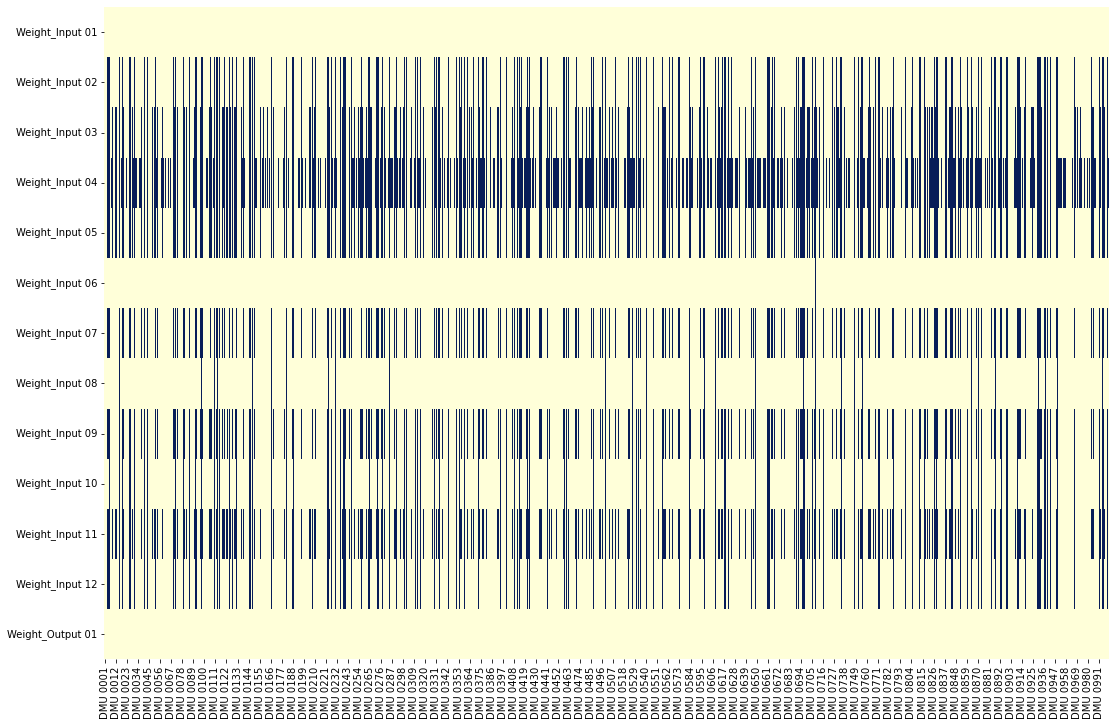

In [38]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [39]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4524,0.4102,0.0422,9.3349,True
DMU 0002,0.6149,0.5851,0.0298,4.8471,True
DMU 0003,0.5319,0.5014,0.0304,5.7215,True
DMU 0004,0.7368,0.7412,-0.0044,-0.6016,True
DMU 0005,0.6556,0.6286,0.0271,4.1261,True
...,...,...,...,...,...
DMU 0996,0.6022,0.5471,0.0551,9.1438,True
DMU 0997,0.6251,0.5702,0.0549,8.7807,True
DMU 0998,0.5620,0.5403,0.0217,3.8675,True
DMU 0999,0.6789,0.6845,-0.0056,-0.8186,True


In [40]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-f6b766ba-5d4d-4f5c-91c7-530402024c2e", "code": {"imports…

In [41]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  923
red :  77


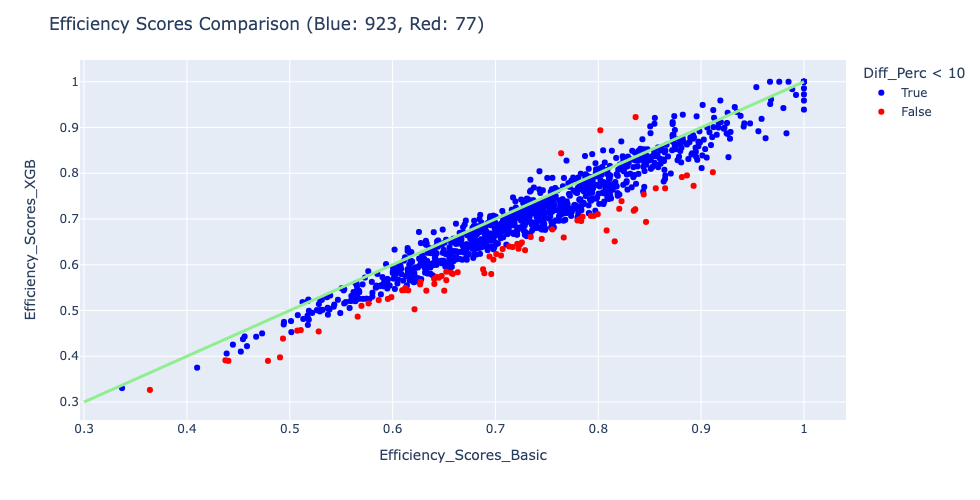

In [42]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()